In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
happy_directory = '/content/drive/MyDrive/data/happy'

sad_directory = '/content/drive/MyDrive/data/sad'

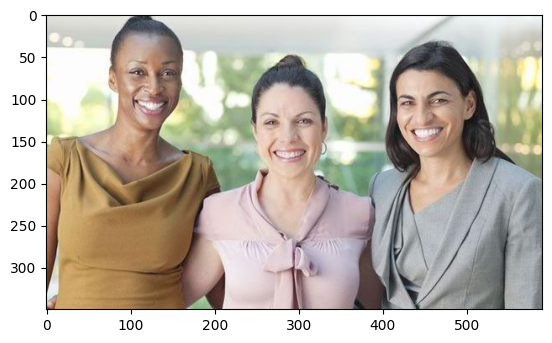

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
import os
happy_image = load_img(
    os.path.join(happy_directory, os.listdir(happy_directory)[0]))
plt.imshow(happy_image)
plt.show()

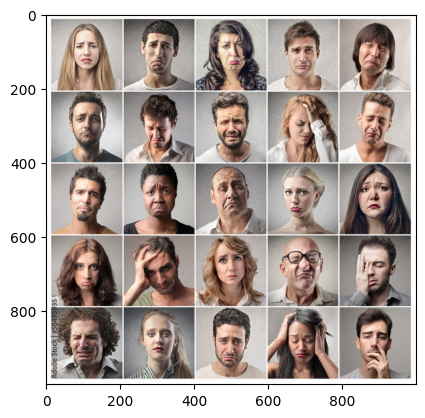

In [ ]:
sad_image = load_img(os.path.join(sad_directory, os.listdir(sad_directory)[1]))
plt.imshow(sad_image)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

sample_array = img_to_array(happy_image)
print(sample_array)

[[[226. 227. 221.]
  [226. 227. 221.]
  [226. 227. 221.]
  ...
  [238. 245. 238.]
  [238. 245. 238.]
  [238. 245. 238.]]

 [[225. 226. 220.]
  [225. 226. 220.]
  [225. 226. 220.]
  ...
  [238. 245. 238.]
  [238. 245. 238.]
  [238. 245. 238.]]

 [[225. 226. 220.]
  [225. 226. 220.]
  [225. 226. 220.]
  ...
  [237. 244. 237.]
  [237. 244. 237.]
  [237. 244. 237.]]

 ...

 [[115.  82.  77.]
  [133. 100.  95.]
  [162. 122. 112.]
  ...
  [119. 124. 128.]
  [119. 124. 128.]
  [119. 124. 128.]]

 [[118.  89.  91.]
  [102.  73.  75.]
  [109.  68.  64.]
  ...
  [117. 122. 126.]
  [117. 122. 126.]
  [117. 122. 126.]]

 [[123.  94.  96.]
  [108.  79.  81.]
  [ 97.  56.  52.]
  ...
  [116. 121. 125.]
  [115. 120. 124.]
  [115. 120. 124.]]]


In [ ]:
np.min(sample_array)

0.0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if logs.get('accuracy') > 0.99:
            print("99% accuracy achieved")
            self.model.stop_training = True

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generation = ImageDataGenerator(rescale = 1/255)

train_data = train_data_generation.flow_from_directory(
    '/content/drive/MyDrive/data/',
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'binary'
)

Found 305 images belonging to 2 classes.


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 16, kernel_size = (3, 3),
                        activation = 'relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(filters = 32, kernel_size = (3, 3),
                        activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(filters = 64, kernel_size = (3, 3),
                        activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),

    keras.layers.Dense(units = 512, activation = 'relu'),

    keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
callbacks = myCallback()

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    loss = 'binary_crossentropy',
    optimizer = RMSprop(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_data,
    epochs = 10,
    verbose = 1,
    callbacks= [callbacks]
)

Epoch 1/10
31/31 [==============================] - 49s 2s/step - loss: 0.8222 - accuracy: 0.5738
Epoch 2/10
31/31 [==============================] - 15s 455ms/step - loss: 0.6532 - accuracy: 0.6984
Epoch 3/10
31/31 [==============================] - 14s 432ms/step - loss: 0.5142 - accuracy: 0.7475
Epoch 4/10
31/31 [==============================] - 14s 458ms/step - loss: 0.4146 - accuracy: 0.8033
Epoch 5/10
31/31 [==============================] - 13s 396ms/step - loss: 0.2898 - accuracy: 0.8885
Epoch 6/10
31/31 [==============================] - 13s 429ms/step - loss: 0.2958 - accuracy: 0.8852
Epoch 7/10
31/31 [==============================] - 13s 410ms/step - loss: 0.1413 - accuracy: 0.9377
Epoch 8/10
31/31 [==============================] - 14s 436ms/step - loss: 0.1373 - accuracy: 0.9443
Epoch 9/10
31/31 [==============================] - 15s 494ms/step - loss: 0.1158 - accuracy: 0.9705
Epoch 10/10
31/31 [==============================] - 14s 439ms/step - loss: 0.0357 - accuracy:

In [ ]:
import base64

encoded_answer = "ClNvbWUgaGVscGZ1bCB0aXBzIGluIGNhc2UgeW91IGFyZSBzdHVjazoKCiAgICAtIEEgZ29vZCBmaXJzdCBsYXllciB3b3VsZCBiZSBhIENvbnYyRCBsYXllciB3aXRoIGFuIGlucHV0IHNoYXBlIHRoYXQgbWF0Y2hlcyAKICAgIHRoYXQgb2YgZXZlcnkgaW1hZ2UgaW4gdGhlIHRyYWluaW5nIHNldCAoaW5jbHVkaW5nIHRoZSBjb2xvciBkaW1lbnNpb24pCiAgICAKICAgIC0gVGhlIG1vZGVsIHdpbGwgd29yayBiZXN0IHdpdGggMyBjb252b2x1dGlvbmFsIGxheWVycwogICAgCiAgICAtIFRoZXJlIHNob3VsZCBiZSBhIEZsYXR0ZW4gbGF5ZXIgaW4gYmV0d2VlbiBjb252b2x1dGlvbmFsIGFuZCBkZW5zZSBsYXllcnMKICAgIAogICAgLSBUaGUgZmluYWwgbGF5ZXIgc2hvdWxkIGJlIGEgRGVuc2UgbGF5ZXIgd2l0aCB0aGUgbnVtYmVyIG9mIHVuaXRzIGFuZCAKICAgIGFjdGl2YXRpb24gZnVuY3Rpb24gdGhhdCBzdXBwb3J0cyBiaW5hcnkgY2xhc3NpZmljYXRpb24uCg=="
encoded_answer = encoded_answer.encode('ascii')
answer = base64.b64decode(encoded_answer)
answer = answer.decode('ascii')

print(answer)


Some helpful tips in case you are stuck:

    - A good first layer would be a Conv2D layer with an input shape that matches 
    that of every image in the training set (including the color dimension)
    
    - The model will work best with 3 convolutional layers
    
    - There should be a Flatten layer in between convolutional and dense layers
    
    - The final layer should be a Dense layer with the number of units and 
    activation function that supports binary classification.

